In [435]:
import pandas as pd
import numpy as np
import seaborn as sns

In [436]:
data = pd.read_csv('./2016-17-to-2018-19-immunizations.csv', encoding = "ISO-8859-1")
data.head()
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [437]:
data.tail()

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN
263070,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,vari,NaN,NaN


In [438]:
data.describe()

,SCHOOL_CODE,ENROLLMENT,COUNT,PERCENT
count,2.630710e+05,253187.000000,81934.000000,207822.000000
mean,5.444149e+06,70.915351,38.144348,54.817045
std,2.111153e+06,49.893938,50.513140,46.702010
min,5.274900e+04,1.000000,0.000000,0.000000
25%,6.015416e+06,29.000000,0.000000,2.000000
50%,6.045611e+06,70.000000,4.000000,94.000000
75%,6.133714e+06,102.000000,73.000000,98.000000
max,9.915507e+06,1117.000000,916.000000,99.000000


In [439]:
data.nunique()

SCHOOL_YEAR          3
SCHOOL_CODE       8863
COUNTY              58
PUBLIC_PRIVATE       2
CITY              1027
SCHOOL_NAME       8369
REPORTED             2
ENROLLMENT         297
CATEGORY            11
COUNT              315
PERCENT            100
dtype: int64

In [440]:
data.shape

(263071, 11)

In [441]:
data.columns

Index(['SCHOOL_YEAR', 'SCHOOL_CODE', 'COUNTY', 'PUBLIC_PRIVATE', 'CITY',
       'SCHOOL_NAME', 'REPORTED', 'ENROLLMENT', 'CATEGORY', 'COUNT',
       'PERCENT'],
      dtype='object')

In [442]:
#finding and droppping duplicate rows
def duplicate_rows_based_on_col(df, columns): return df[df.duplicated(columns)]
duplicate_rows_based_on_col(data,['SCHOOL_YEAR','CATEGORY'])

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
11,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,pme,NaN,5.0
12,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,pbe,NaN,5.0
13,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,overdue,NaN,5.0
14,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,others,NaN,5.0
15,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,conditional,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [443]:
# checking for garbage values in each columns

In [444]:
data['SCHOOL_YEAR'].unique()

array(['2016-2017', '2017-2018', '2018-2019'], dtype=object)

In [445]:
data['SCHOOL_CODE'].unique()

array([  52749,  100016,  100024, ..., 7337100, 7614391, 9070187],
      dtype=int64)

In [446]:
data['COUNTY'].unique()

array(['monterey', 'madera', 'el dorado', 'tuolumne', 'san bernardino',
       'alameda', 'riverside', 'san joaquin', 'los angeles', 'ventura',
       'santa cruz', 'sacramento', 'contra costa', 'san diego', 'sutter',
       'kern', 'orange', 'mendocino', 'stanislaus', 'sonoma', 'kings',
       'tulare', 'santa barbara', 'tehama', 'butte', 'santa clara',
       'merced', 'placer', 'fresno', 'san mateo', 'yuba', 'lake',
       'san luis obispo', 'napa', 'humboldt', 'shasta', 'yolo',
       'san francisco', 'solano', 'imperial', 'del norte', 'nevada',
       'san benito', 'siskiyou', 'lassen', 'marin', 'glenn', 'mariposa',
       'trinity', 'amador', 'calaveras', 'colusa', 'plumas', 'alpine',
       'inyo', 'modoc', 'mono', 'sierra'], dtype=object)

In [447]:
data['PUBLIC_PRIVATE'].unique()

array(['private', 'public'], dtype=object)

In [448]:
data['CITY'].unique()

array(['prunedale', 'madera', 'el dorado hills', ..., 'windsor hills',
       'oja', 'lancaster,'], dtype=object)

In [449]:
data['SCHOOL_NAME'].unique()

array(['prunedale christian academy', 'sherman thomas charter',
       'oak meadow elementary', ...,
       'montessori elementary and middle school of tracy',
       'toddler tech university',
       'claires montessori international academy'], dtype=object)

In [450]:
data['REPORTED'].unique()

array(['y', 'n'], dtype=object)

In [451]:
data['ENROLLMENT'].unique()

array([1.000e+01, 3.000e+01, 1.270e+02, 1.000e+00, 5.600e+01, 8.300e+01,
       1.800e+01, 1.400e+02, 1.200e+02, 1.160e+02,       nan, 6.700e+01,
       1.070e+02, 5.900e+01, 1.210e+02, 1.100e+02, 9.800e+01, 9.000e+01,
       1.290e+02, 1.120e+02, 9.900e+01, 9.100e+01, 1.080e+02, 1.110e+02,
       1.300e+02, 1.130e+02, 1.500e+02, 8.100e+01, 4.000e+01, 1.370e+02,
       1.140e+02, 8.800e+01, 1.480e+02, 1.440e+02, 1.430e+02, 5.800e+01,
       1.930e+02, 1.020e+02, 9.500e+01, 8.400e+01, 4.800e+01, 4.900e+01,
       9.600e+01, 1.740e+02, 1.570e+02, 6.800e+01, 1.360e+02, 1.610e+02,
       1.560e+02, 1.240e+02, 1.200e+01, 4.000e+00, 1.420e+02, 7.800e+01,
       5.000e+01, 1.040e+02, 9.400e+01, 8.600e+01, 1.250e+02, 1.150e+02,
       1.000e+02, 7.200e+01, 1.050e+02, 1.380e+02, 1.350e+02, 1.540e+02,
       1.010e+02, 1.720e+02, 7.100e+01, 5.000e+00, 5.200e+01, 6.400e+01,
       1.530e+02, 1.230e+02, 2.160e+02, 4.500e+01, 1.090e+02, 2.000e+00,
       1.920e+02, 1.470e+02, 8.900e+01, 1.510e+02, 

In [452]:
data['CATEGORY'].unique()

array(['pbe', 'hepb', 'dtp', 'polio', 'up-to-date', 'others', 'vari',
       'conditional', 'overdue', 'pme', 'mmr'], dtype=object)

In [453]:
data['COUNT'].unique()

array([ nan,   0.,   2., 121., 123., 124.,   4.,   8., 128., 132., 135.,
         3., 117.,   1.,  56.,  57.,   7., 112., 114., 116., 119., 122.,
         5., 107., 108., 103., 105., 106., 109., 110., 111., 146.,  35.,
        36.,  37.,   9.,  10., 130., 134., 137., 139., 141., 131.,  12.,
        18., 143., 153., 160., 163., 166., 169., 126., 136., 100.,  90.,
        92.,  89.,  91.,   6., 165., 170., 154.,  21., 133., 138., 144.,
       147., 149., 152.,  76.,  48.,  14.,  64.,  65.,  68.,  71.,  74.,
       142., 145.,  97.,  81.,  82.,  83., 151., 167., 168.,  66.,  60.,
        61.,  62., 148., 150.,  40.,  41., 104., 185., 186., 187.,  67.,
        93.,  95.,  54.,  55.,  51.,  84., 101.,  25.,  29., 178., 182.,
       184., 191.,  17.,  85.,  49.,  96.,  98., 102.,  77.,  72.,  73.,
        24., 120.,  80.,  78., 127., 115., 157.,  63.,  69., 118.,  99.,
        58.,  26.,  27.,  28., 171., 140., 113.,  94., 278., 292., 293.,
       297., 226.,  19.,  79.,  23., 129.,  75.,  1

In [454]:
data['PERCENT'].unique()

array([nan,  5., 95.,  0.,  2., 97., 98.,  3.,  6., 91., 94., 96., 99.,
        1., 93.,  8., 88., 90.,  7., 87., 89.,  4.,  9., 74., 79., 83.,
       85., 86., 13., 82., 92., 12., 14., 62., 63., 65., 68., 71., 73.,
       11., 38., 61., 66., 67., 76., 46., 54., 17., 10., 29., 78., 80.,
       15., 60., 70., 16., 84., 20., 50., 51., 53., 56., 43., 49., 57.,
       58., 77., 81., 32., 52., 18., 75., 41., 59., 69., 31., 40., 42.,
       44., 47., 55., 19., 26., 48., 72., 64., 39., 33., 36., 37., 35.,
       45., 21., 34., 30., 27., 28., 23., 22., 24., 25.])

In [455]:
#checking null values
data.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT          9884
CATEGORY               0
COUNT             181137
PERCENT            55249
dtype: int64

In [456]:
# getting rows with null columns
def nans(df): return df[df.isnull().any(axis=1)]
def nans_col(df, column): return df[df[column].isnull()]

In [457]:
nans(data)

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [458]:
nans_col(data, 'ENROLLMENT')

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
110,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,polio,NaN,NaN
111,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,up-to-date,NaN,NaN
112,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,pme,NaN,NaN
113,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,overdue,NaN,NaN
114,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,dtp,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263046,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,dtp,NaN,NaN
263047,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,polio,NaN,NaN
263048,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,mmr,NaN,NaN
263049,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,hepb,NaN,NaN


In [459]:
#rows dropped with columns enrollment, count, percent nan
df_new = data.dropna(subset=['ENROLLMENT', 'COUNT', 'PERCENT'], thresh=1)
df_new

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [460]:
df_new.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT             0
CATEGORY               0
COUNT             171253
PERCENT            45365
dtype: int64

In [461]:
nans_col(df_new, 'PERCENT')

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [462]:
nans_col(df_new, 'COUNT')

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [463]:
df_new.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT             0
CATEGORY               0
COUNT             171253
PERCENT            45365
dtype: int64

In [464]:
#fill count where percent is present
for index, row in df_new.iterrows():
    if pd.isnull(row['COUNT']) and pd.notnull(row['PERCENT']):
        new_count_value = row['ENROLLMENT'] * (row['PERCENT'] / 100)
        df_new.at[index,'COUNT'] = new_count_value

        
#checking sum afterwards
df_new.isnull().sum()

SCHOOL_YEAR           0
SCHOOL_CODE           0
COUNTY                0
PUBLIC_PRIVATE        0
CITY                  0
SCHOOL_NAME           0
REPORTED              0
ENROLLMENT            0
CATEGORY              0
COUNT             45365
PERCENT           45365
dtype: int64

In [465]:
#percentage column can be dropped because this coulmn can be calculated
df_new = df_new.drop('PERCENT', 1)
df_new

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN
...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN


In [466]:
#filling remaining count with avg count of school that year

for row in df_new['SCHOOL_YEAR'].unique():
    df_new_set_by_year = df_new.loc[df_new['SCHOOL_YEAR'] == row]
    for row2 in df_new_set_by_year['SCHOOL_NAME'].unique():
        df_new_set_with_year_and_school_name = df_new_set_by_year[df_new_set_by_year['SCHOOL_NAME'] == row2]
        mean_school_year_with_school = df_new_set_with_year_and_school_name['ENROLLMENT'].mean()
        #where count is nan put the avg
        for index, rows in df_new_set_with_year_and_school_name.iterrows():
            if pd.isnull(rows['COUNT']):
                df_new.at[index,'COUNT'] = mean_school_year_with_school
        
        #print(df_new_set_with_year_and_school_name.count())
        #print(df_new_set_with_year_and_school_name['ENROLLMENT'].mean())
        
#df_new.loc[(df_new['SCHOOL_YEAR'] == '2016-2017') & (df_new['SCHOOL_NAME'] == 'WOOD ROSE ACADEMY') , 'ENROLLMENT']

    

In [467]:
df_new.isnull().sum()

SCHOOL_YEAR       0
SCHOOL_CODE       0
COUNTY            0
PUBLIC_PRIVATE    0
CITY              0
SCHOOL_NAME       0
REPORTED          0
ENROLLMENT        0
CATEGORY          0
COUNT             0
dtype: int64

In [468]:
#replacing count with enrollment where count > enrollment
for index, rows in df_new.loc[df_new['ENROLLMENT'] < df_new['COUNT']].iterrows():
    df_new.at[index, 'COUNT'] = rows['ENROLLMENT']


In [469]:
#finding and removing duplicate rows
#find duplicate rows based on repitition of SCHOOL_YEAR, SCHOOL_CODE, CATEGORY
duplicate_rows_based_on_col(data,['SCHOOL_YEAR','SCHOOL_CODE','CATEGORY'])

#since no repitition so no need to remove duplicates

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT


In [470]:
import numpy as np
from sklearn import preprocessing

In [471]:
#normalizing data from enrollment and count
df_normalized = df_new[['ENROLLMENT', 'COUNT']]
df_normalized = preprocessing.normalize(df_normalized, axis=0)
df_normalized

array([[0.0002292 , 0.0003195 ],
       [0.0002292 , 0.0003195 ],
       [0.0002292 , 0.0003195 ],
       ...,
       [0.0003438 , 0.00047925],
       [0.0003438 , 0.00047925],
       [0.0003438 , 0.00047925]])

In [472]:
df_normalized = pd.DataFrame(df_normalized, columns=['ENROLLMENT','COUNT'])
df_normalized.head()
df_new['ENROLLMENT'] = df_normalized['ENROLLMENT']
df_new['COUNT'] = df_normalized['COUNT']
df_new.head()

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,pbe,0.000319
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,hepb,0.000319
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,dtp,0.000319
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,polio,0.000319
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,up-to-date,0.000319


In [473]:
#at this point df_new is the null removed, duplicate checked, normalized dataset

In [475]:
df_new.groupby(['SCHOOL_YEAR', 'PUBLIC_PRIVATE']).head()

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,pbe,0.000319
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,hepb,0.000319
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,dtp,0.000319
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,polio,0.000319
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.000229,up-to-date,0.000319
11,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.000688,pme,0.000048
12,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.000688,pbe,0.000048
13,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.000688,overdue,0.000048
14,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.000688,others,0.000048
15,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.000688,conditional,0.000048


pbe 15777
hepb 23741
dtp 23741
polio 23741
up-to-date 23741
others 23741
vari 23741
conditional 23741
overdue 23741
pme 23741
mmr 23741


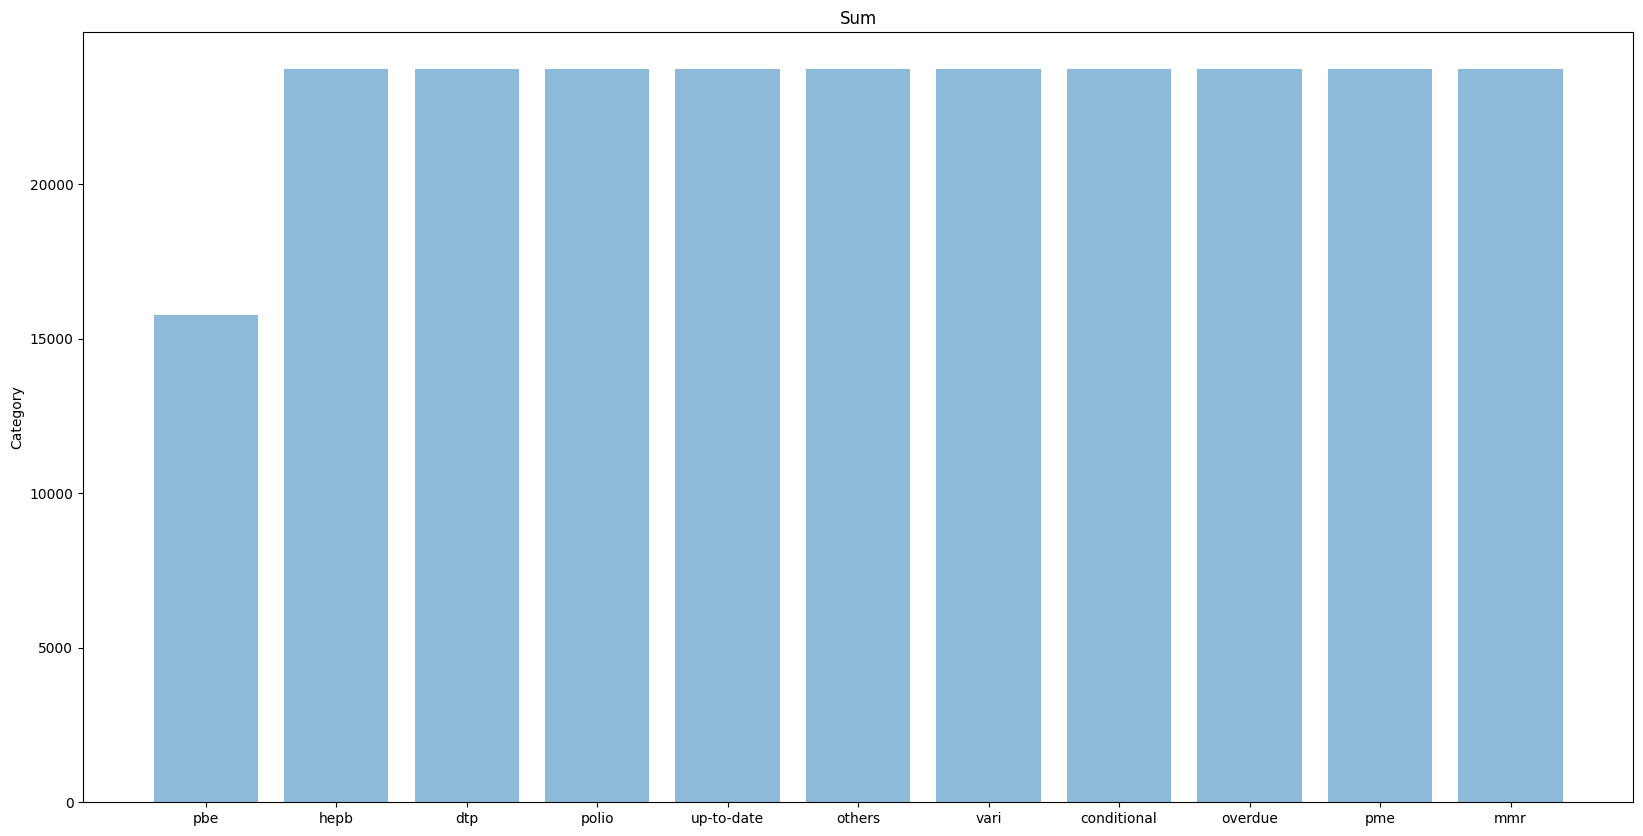

In [481]:
import matplotlib.pyplot as plt;
import numpy as np

x = []
y = []
for category in df_new['CATEGORY'].unique():
    row_count = df_new.loc[df_new['CATEGORY'] == category, 'CATEGORY'].count()
    print(category, row_count)
    x.append(category)
    y.append(row_count)
plt.figure(figsize=(20,10))
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Category')
plt.title('Sum')

plt.show()

#for row in df_new['SCHOOL_YEAR'].unique():
 #   row_set_checked = df_new.loc[(df_new['SCHOOL_YEAR'] == row) & df_new['CATEGORY'] == 'PBE']
  #  row_set_checked.head()
    
    #print(row , row_set_checked['ENROLLMENT'].sum(), row_set_checked['COUNT'].sum())